## POS tagging using modified Viterbi - By Saiyana Ramisetty
### Data Preparation

In [254]:
# Importing libraries which are needed

import nltk
import random
from sklearn.model_selection import train_test_split
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from nltk.tokenize import word_tokenize

In [255]:
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset = 'universal'))

In [256]:
# Exploring the dataset
nltk_data

[[('Pierre', 'NOUN'),
  ('Vinken', 'NOUN'),
  (',', '.'),
  ('61', 'NUM'),
  ('years', 'NOUN'),
  ('old', 'ADJ'),
  (',', '.'),
  ('will', 'VERB'),
  ('join', 'VERB'),
  ('the', 'DET'),
  ('board', 'NOUN'),
  ('as', 'ADP'),
  ('a', 'DET'),
  ('nonexecutive', 'ADJ'),
  ('director', 'NOUN'),
  ('Nov.', 'NOUN'),
  ('29', 'NUM'),
  ('.', '.')],
 [('Mr.', 'NOUN'),
  ('Vinken', 'NOUN'),
  ('is', 'VERB'),
  ('chairman', 'NOUN'),
  ('of', 'ADP'),
  ('Elsevier', 'NOUN'),
  ('N.V.', 'NOUN'),
  (',', '.'),
  ('the', 'DET'),
  ('Dutch', 'NOUN'),
  ('publishing', 'VERB'),
  ('group', 'NOUN'),
  ('.', '.')],
 [('Rudolph', 'NOUN'),
  ('Agnew', 'NOUN'),
  (',', '.'),
  ('55', 'NUM'),
  ('years', 'NOUN'),
  ('old', 'ADJ'),
  ('and', 'CONJ'),
  ('former', 'ADJ'),
  ('chairman', 'NOUN'),
  ('of', 'ADP'),
  ('Consolidated', 'NOUN'),
  ('Gold', 'NOUN'),
  ('Fields', 'NOUN'),
  ('PLC', 'NOUN'),
  (',', '.'),
  ('was', 'VERB'),
  ('named', 'VERB'),
  ('*-1', 'X'),
  ('a', 'DET'),
  ('nonexecutive', 'ADJ'),
 

In [257]:
# Getting the length of universal dataset
len(nltk_data)

3914

Splitting the Treebank dataset into train and validation sets. Using a sample size of 95:5 for training: validation sets, i.e. keeping the validation size small, else the algorithm will need a very high amount of runtime.

In [258]:
# Splitting nltk_data into training set 95% and validation set 5%
random.seed(10)
training_set, validation_set = train_test_split(nltk_data, test_size = 0.05)

In [259]:
# Getting the length of 
len(training_set)

3718

In [260]:
len(validation_set)

196

After splitting we obtained 3718 entries in training dataset and 196 entries in the validation dataset.

Getting the list of tagged words from training dataset.

In [261]:
training_tagged_words = [x for sentence in training_set for x in sentence]

In [262]:
training_tagged_words

[('But', 'CONJ'),
 ('the', 'DET'),
 ('number', 'NOUN'),
 ('of', 'ADP'),
 ('weddings', 'NOUN'),
 ('last', 'ADJ'),
 ('year', 'NOUN'),
 ('--', '.'),
 ('271,124', 'NUM'),
 ('--', '.'),
 ('was', 'VERB'),
 ('still', 'ADV'),
 ('well', 'ADV'),
 ('below', 'ADP'),
 ('the', 'DET'),
 ('400,000', 'NUM'),
 ('registered', 'VERB'),
 ('*', 'X'),
 ('in', 'ADP'),
 ('1972', 'NUM'),
 (',', '.'),
 ('the', 'DET'),
 ('last', 'ADJ'),
 ('year', 'NOUN'),
 ('of', 'ADP'),
 ('increasing', 'VERB'),
 ('marriages', 'NOUN'),
 ('.', '.'),
 ('Chemical', 'NOUN'),
 ('Bank', 'NOUN'),
 ('spent', 'VERB'),
 ('more', 'ADJ'),
 ('than', 'ADP'),
 ('$', '.'),
 ('50', 'NUM'),
 ('million', 'NUM'),
 ('*U*', 'X'),
 ('*-1', 'X'),
 ('to', 'PRT'),
 ('introduce', 'VERB'),
 ('its', 'PRON'),
 ('ChemPlus', 'NOUN'),
 ('line', 'NOUN'),
 (',', '.'),
 ('several', 'ADJ'),
 ('packages', 'NOUN'),
 ('aimed', 'VERB'),
 ('*', 'X'),
 ('at', 'ADP'),
 ('different', 'ADJ'),
 ('segments', 'NOUN'),
 (',', '.'),
 ('in', 'ADP'),
 ('1986', 'NUM'),
 (',', '.'),


In [263]:
len(training_tagged_words)

95757

As we can see from the above result, there are 95000+ tagged words in the training dataset. 

Retrieving the Vocabulary (tokens) from the training dataset.

In [264]:
tokens = [pair[0] for pair in training_tagged_words]
tokens

['But',
 'the',
 'number',
 'of',
 'weddings',
 'last',
 'year',
 '--',
 '271,124',
 '--',
 'was',
 'still',
 'well',
 'below',
 'the',
 '400,000',
 'registered',
 '*',
 'in',
 '1972',
 ',',
 'the',
 'last',
 'year',
 'of',
 'increasing',
 'marriages',
 '.',
 'Chemical',
 'Bank',
 'spent',
 'more',
 'than',
 '$',
 '50',
 'million',
 '*U*',
 '*-1',
 'to',
 'introduce',
 'its',
 'ChemPlus',
 'line',
 ',',
 'several',
 'packages',
 'aimed',
 '*',
 'at',
 'different',
 'segments',
 ',',
 'in',
 '1986',
 ',',
 'according',
 'to',
 'Thomas',
 'Jacob',
 ',',
 'senior',
 'vice',
 'president',
 'of',
 'marketing',
 '.',
 'And',
 'while',
 'there',
 'was',
 'no',
 'profit',
 '*ICH*-1',
 'this',
 'year',
 'from',
 'discontinued',
 'operations',
 ',',
 'last',
 'year',
 'they',
 'contributed',
 '#',
 '34',
 'million',
 '*U*',
 ',',
 'before',
 'tax',
 '.',
 'The',
 'Army',
 'Corps',
 'is',
 'cutting',
 'the',
 'flow',
 'of',
 'the',
 'Missouri',
 'River',
 'about',
 'two',
 'weeks',
 'earlier',
 '

In [265]:
# Total count of vocabulary, removing the duplicates
vocabulary = set(tokens)
vocabulary

{'lap-shoulder',
 'Malaysia',
 'Hopwood',
 '8.14',
 'expressed',
 'U.K.',
 'Asia',
 '*-17',
 'Traverse',
 'Peck',
 '12.82',
 '8.2',
 'C-90',
 'marching',
 'part',
 'zoomed',
 'saw',
 '41',
 'Neither',
 'local',
 'leaky',
 'sprightly',
 'granting',
 'available',
 'illegality',
 'retractable',
 'rigid',
 'bombs',
 'International',
 'Mikhail',
 'gives',
 'Circuit',
 'practitioners',
 'Alstyne',
 'free-lance',
 '*-29',
 'narcotics',
 'insider-trading',
 '52-week',
 'featured',
 '16.9',
 'loyal',
 'engineering',
 'involves',
 'fails',
 '7.5',
 'attracting',
 'ties',
 '17',
 'Pramual',
 'under',
 'persons',
 'agriculture',
 'W.',
 'disclosure',
 '1.82',
 'lipsticks',
 'quantities',
 'Jeffrey',
 'Lentjes',
 'Virtually',
 'could',
 'SAT',
 'cop-killer',
 'scenario',
 'happens',
 'architect',
 'Brisk',
 'quotas',
 '*T*-211',
 'greed',
 'imagine',
 'Gov.',
 'mind',
 'shareholder-rights',
 'two-year',
 'reds',
 'skepticism',
 'arguing',
 'Campaign',
 'supporters',
 'symptoms',
 'willingness',
 'n

In [266]:
len(vocabulary)

12114

Similary getting the POS tags from training dataset. As mentioned in the problem statement, the Universal tagset of NLTK comprises only 12 coarse tag classes as follows: **Verb, Noun, Pronouns, Adjectives, Adverbs, Adpositions, Conjunctions, Determiners, Cardinal Numbers, Particles, Other/ Foreign words, Punctuations.**

Note that using only 12 coarse classes (compared to the 46 fine classes such as NNP, VBD etc.) will make the Viterbi algorithm faster as well.

Let us check if we have these 12 classes tags in training dataset.

In [267]:
tags = [pair[1] for pair in training_tagged_words]
unique_tags = set(tags)
unique_tags

{'.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X'}

In [268]:
len(unique_tags)

12

Let us find out the total number of occurrences for each POS tags in the training dataset.

In [269]:
# Using Counter() from collections to get the frequency of elements
tag_counts = Counter(tags)
tag_counts.most_common()

[('NOUN', 27438),
 ('VERB', 12877),
 ('.', 11133),
 ('ADP', 9385),
 ('DET', 8302),
 ('X', 6282),
 ('ADJ', 6120),
 ('NUM', 3405),
 ('PRT', 3068),
 ('ADV', 3003),
 ('PRON', 2591),
 ('CONJ', 2153)]

### POS Tagging Algorithm - HMM
We'll use the HMM algorithm to tag the words. Given a sequence of words to be tagged, the task is to assign the most probable tag to the word.

In other words, to every word w, assign the tag t that maximises the likelihood P(t/w). Since P(t/w) = P(w/t). P(t) / P(w), after ignoring P(w), we have to compute P(w/t) and P(t).

P(w/t) is basically the probability that given a tag (say NN), what is the probability of it being w (say 'building'). This can be computed by computing the fraction of all NNs which are equal to w, i.e.

P(w/t) = count(w, t) / count(t).

The term P(t) is the probability of tag t, and in a tagging task, we assume that a tag will depend only on the previous tag. In other words, the probability of a tag being NN will depend only on the previous tag t(n-1). So for e.g. if t(n-1) is a JJ, then t(n) is likely to be an NN since adjectives often precede a noun (blue coat, tall building etc.).

### Emission Probabilities 

In [270]:
# computing P(w/t) and storing in T x V matrix
t = len(tags)
v = len(vocabulary)
w_given_t = np.zeros((t, v))

In [271]:
# compute word given tag: Emission Probability
def word_given_tag(word, tag, train_bag = training_tagged_words):
    tag_list = [x for x in train_bag if x[1] == tag]
    count_tag = len(tag_list)
    w_given_tag_list = [x[0] for x in tag_list if x[0] == word]
    count_w_given_tag = len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)

In [272]:
# Emission probabilities for the word dollars
print(word_given_tag('dollars', 'NOUN'))
print(word_given_tag('dollars', 'ADJ'))

(16, 27438)
(0, 6120)


### Transition Probabilities

In [273]:
# Computing transition probabilities - tag2 given tag1
def tag2_given_tag1(tag2, tag1, train_bag = training_tagged_words):
    count_tag1 = len([t for t in tags if t == tag1])
    count_tag2_tag1 = 0
    for index in range(len(tags) - 1):
        if tags[index] == tag1 and tags[index + 1] == tag2:
            count_tag2_tag1 += 1
    
    return (count_tag2_tag1, count_tag1)

In [274]:
print('Transition Probability : VERB -> ADV')
print(tag2_given_tag1('ADV', 'VERB'))

Transition Probability : VERB -> ADV
(1044, 12877)


In [275]:
print('Transition Probability : NOUN -> VERB')
print(tag2_given_tag1('VERB', 'NOUN')) 

Transition Probability : NOUN -> VERB
(4022, 27438)


In [276]:
print('Transition Probability : ADJ -> NOUN')
print(tag2_given_tag1('NOUN', 'ADJ'))

Transition Probability : ADJ -> NOUN
(4276, 6120)


In [277]:
# creating t x t transition matrix of tags
# each column is t2, each row is t1
# thus M(i, j) represents P(tj given ti)

tags_matrix = np.zeros((len(unique_tags), len(unique_tags)), dtype = 'float32')
for i, t1 in enumerate(list(unique_tags)):
    for j, t2 in enumerate(list(unique_tags)): 
        tags_matrix[i, j] = tag2_given_tag1(t2, t1)[0]/tag2_given_tag1(t2, t1)[1]

In [278]:
tags_matrix

array([[6.68300688e-02, 4.73856227e-03, 6.53594790e-04, 6.43790886e-02,
        2.05882359e-02, 1.69934649e-02, 4.90196096e-03, 6.98692799e-01,
        2.15686280e-02, 1.11111114e-02, 1.22549022e-02, 7.72875845e-02],
       [1.31868139e-01, 7.79220760e-02, 1.49850147e-02, 1.36530131e-01,
        3.06360312e-02, 6.66000647e-03, 6.92640692e-02, 3.03030312e-02,
        2.33100224e-02, 1.43190147e-02, 3.44322354e-01, 1.19880117e-01],
       [7.33307600e-02, 3.31918187e-02, 7.71902734e-03, 4.12967950e-02,
        7.33307609e-03, 5.40331937e-03, 9.64878406e-03, 2.11115405e-01,
        9.22423750e-02, 1.23504438e-02, 4.84368980e-01, 2.19992287e-02],
       [4.47318777e-02, 5.26363067e-02, 6.55708238e-02, 9.22482684e-02,
        8.20982680e-02, 5.83849810e-02, 1.72999188e-01, 2.21234173e-01,
        2.74858531e-02, 2.33539916e-03, 8.84757042e-02, 9.17093307e-02],
       [3.31864916e-02, 2.64317170e-03, 1.46842876e-03, 1.15418501e-01,
        1.85903087e-01, 1.38032306e-02, 2.93685752e-03, 3.53

In [279]:
# convert the matrix to a df for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(unique_tags), index = list(unique_tags))

In [280]:
tags_df

,ADJ,ADV,PRON,.,NUM,CONJ,DET,NOUN,X,PRT,VERB,ADP
ADJ,0.066830,0.004739,0.000654,0.064379,0.020588,0.016993,0.004902,0.698693,0.021569,0.011111,0.012255,0.077288
ADV,0.131868,0.077922,0.014985,0.136530,0.030636,0.006660,0.069264,0.030303,0.023310,0.014319,0.344322,0.119880
PRON,0.073331,0.033192,0.007719,0.041297,0.007333,0.005403,0.009649,0.211115,0.092242,0.012350,0.484369,0.021999
.,0.044732,0.052636,0.065571,0.092248,0.082098,0.058385,0.172999,0.221234,0.027486,0.002335,0.088476,0.091709
NUM,0.033186,0.002643,0.001468,0.115419,0.185903,0.013803,0.002937,0.353304,0.210866,0.027019,0.018209,0.035242
CONJ,0.119833,0.055272,0.058987,0.034835,0.043196,0.000464,0.116582,0.349745,0.007896,0.004645,0.155132,0.053414
DET,0.205131,0.012527,0.003614,0.017827,0.022404,0.000361,0.005541,0.637075,0.046374,0.000241,0.039509,0.009395
NOUN,0.012392,0.017093,0.004811,0.240141,0.009549,0.042642,0.013631,0.263248,0.028829,0.044209,0.146585,0.176871
X,0.016874,0.026266,0.054123,0.164279,0.002547,0.010347,0.054441,0.061764,0.074021,0.184655,0.205508,0.145177
PRT,0.083116,0.009778,0.017601,0.042699,0.058018,0.001956,0.100391,0.248370,0.013690,0.001630,0.401565,0.021186


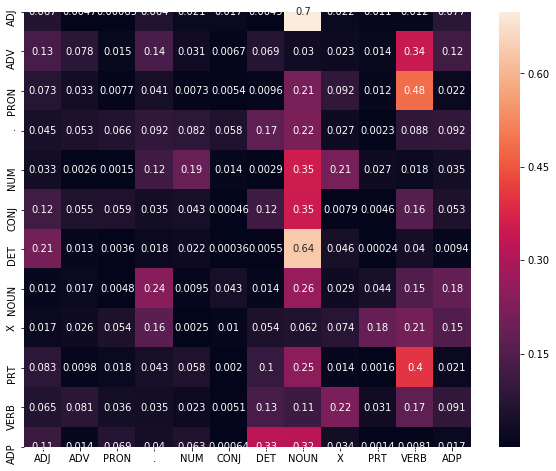

In [281]:
# heatmap of tags matrix
# T(i, j) means P(tag j given tag i)
plt.figure(figsize = (10, 8))
sns.heatmap(tags_df, annot = True)
plt.show()

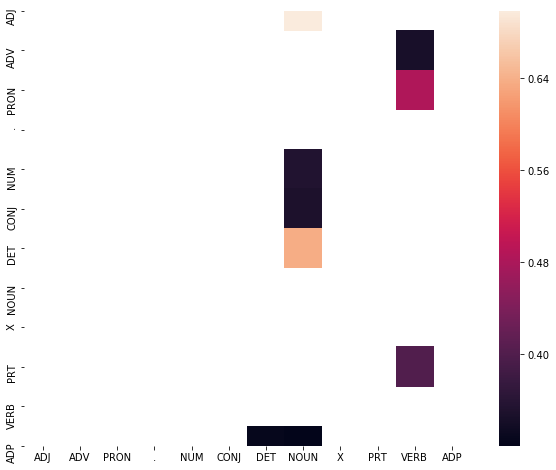

In [282]:
# frequent tags
# filter the df to get P(t2, t1) > 0.3
tags_frequent = tags_df[tags_df > 0.3]
plt.figure(figsize = (10, 8))
sns.heatmap(tags_frequent)
plt.show()

### Build the Vanilla Viterbi based POS tagger

Let's now use the computed probabilities P(w, tag) and P(t2, t1) to assign tags to each word in the document. We'll run through each word w and compute P(tag/w)=P(w/tag).P(tag) for each tag in the tag set, and then assign the tag having the max P(tag/w).

We'll store the assigned tags in a list of tuples, similar to the list 'training_tagged_words'. Each tuple will be a (token, assigned_tag). As we progress further in the list, each tag to be assigned will use the tag of the previous token.

Note: P(tag|start) = P(tag|'.') 

In [283]:
# Viterbi Heuristic
def Viterbi(words):
    state = []
    T = list(set([pair[1] for pair in training_tagged_words]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    
    return list(zip(words, state))

In [284]:
random.seed(10)

# list of tagged words
validation_run_base = [tup for sent in validation_set for tup in sent]

# list of untagged words
validation_tagged_words = [tup[0] for sent in validation_set for tup in sent]

In [285]:
len(validation_tagged_words)

4919

In [286]:
# tagging the validation data sentences
tagged_seq = Viterbi(validation_tagged_words)

In [287]:
tagged_seq

[('New', 'NOUN'),
 ('England', 'NOUN'),
 ('Electric', 'NOUN'),
 ('System', 'NOUN'),
 ('bowed', 'VERB'),
 ('out', 'PRT'),
 ('of', 'ADP'),
 ('the', 'DET'),
 ('bidding', 'NOUN'),
 ('for', 'ADP'),
 ('Public', 'NOUN'),
 ('Service', 'NOUN'),
 ('Co.', 'NOUN'),
 ('of', 'ADP'),
 ('New', 'NOUN'),
 ('Hampshire', 'NOUN'),
 (',', '.'),
 ('*-1', 'X'),
 ('saying', 'VERB'),
 ('that', 'ADP'),
 ('the', 'DET'),
 ('risks', 'NOUN'),
 ('were', 'VERB'),
 ('too', 'ADV'),
 ('high', 'ADJ'),
 ('*RNR*-4', 'ADJ'),
 ('and', 'CONJ'),
 ('the', 'DET'),
 ('potential', 'ADJ'),
 ('payoff', 'ADJ'),
 ('too', 'ADV'),
 ('far', 'ADV'),
 ('in', 'ADP'),
 ('the', 'DET'),
 ('future', 'ADJ'),
 ('*RNR*-4', 'ADJ'),
 ('*', 'X'),
 ('to', 'PRT'),
 ('justify', 'VERB'),
 ('a', 'DET'),
 ('higher', 'ADJ'),
 ('offer', 'NOUN'),
 ('.', '.'),
 ('Mr.', 'NOUN'),
 ('McGovern', 'NOUN'),
 ('was', 'VERB'),
 ('widely', 'ADV'),
 ('seen', 'VERB'),
 ('*-1', 'X'),
 ('as', 'ADP'),
 ('sales', 'NOUN'),
 (',', '.'),
 ('and', 'CONJ'),
 ('not', 'ADV'),
 ('prof

In [288]:
# accuracy
check = [i for i, j in zip(tagged_seq, validation_run_base) if i == j]

In [289]:
vanilla_viterbi_accuracy = len(check) / len(tagged_seq)
vanilla_viterbi_accuracy = round(vanilla_viterbi_accuracy * 100, 2)

In [290]:
print('Vanilla Viterbi Algorithm Accuracy: ', vanilla_viterbi_accuracy , "%")

Vanilla Viterbi Algorithm Accuracy:  92.32 %


In [291]:
# Finding incorrectly tagged words in validation dataset
incorrect_tagged_cases = [[validation_run_base[i-1], j] for i, j in enumerate(zip(tagged_seq, validation_run_base)) if j[0] != j[1]]
incorrect_tagged_cases

[[('bowed', 'VERB'), (('out', 'PRT'), ('out', 'ADP'))],
 [('high', 'ADJ'), (('*RNR*-4', 'ADJ'), ('*RNR*-4', 'X'))],
 [('potential', 'ADJ'), (('payoff', 'ADJ'), ('payoff', 'NOUN'))],
 [('the', 'DET'), (('future', 'ADJ'), ('future', 'NOUN'))],
 [('future', 'NOUN'), (('*RNR*-4', 'ADJ'), ('*RNR*-4', 'X'))],
 [('not', 'ADV'), (('profit', 'VERB'), ('profit', 'NOUN'))],
 [('Mr.', 'NOUN'), (('Baris', 'ADJ'), ('Baris', 'NOUN'))],
 [('they', 'PRON'), (('approach', 'NOUN'), ('approach', 'VERB'))],
 [('market', 'NOUN'), (("'s", 'PRT'), ("'s", 'VERB'))],
 [('its', 'PRON'), (('pains', 'ADJ'), ('pains', 'NOUN'))],
 [('and', 'CONJ'), (('soldiers', 'ADJ'), ('soldiers', 'NOUN'))],
 [('to', 'PRT'), (('harass', 'ADJ'), ('harass', 'VERB'))],
 [('who', 'PRON'), (('*T*-246', 'ADJ'), ('*T*-246', 'X'))],
 [('the', 'DET'), (('past', 'ADJ'), ('past', 'NOUN'))],
 [('*T*-1', 'X'), (('causes', 'NOUN'), ('causes', 'VERB'))],
 [('investors', 'NOUN'), (('initiating', 'ADJ'), ('initiating', 'VERB'))],
 [('a', 'DET'), (

Using the Test sentences file to find how the unknown words in the Universal corpus are tagged.

In [292]:
file = open('Test_sentences.txt', 'r')
lines = file.readlines()
file.close()

In [293]:
test_sentences_lines =[sentence.rstrip() for sentence in lines if sentence.rstrip() != '']
test_sentences_lines

['Android is a mobile operating system developed by Google.',
 'Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.',
 "Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.",
 'Twitter is an online news and social networking service on which users post and interact with messages known as tweets.',
 'Before entering politics, Donald Trump was a domineering businessman and a television personality.',
 'The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.',
 'This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe.',
 'Show me the cheapest round trips from Dallas to Atlanta',
 'I would like to see flights from Denver to Philadelphia.',
 'Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco.',
 'NASA invited social media users to experienc

In [294]:
test_sentences_words = [test_sentences_tokens for line in test_sentences_lines for test_sentences_tokens in word_tokenize(line)]
test_sentences_words

['Android',
 'is',
 'a',
 'mobile',
 'operating',
 'system',
 'developed',
 'by',
 'Google',
 '.',
 'Android',
 'has',
 'been',
 'the',
 'best-selling',
 'OS',
 'worldwide',
 'on',
 'smartphones',
 'since',
 '2011',
 'and',
 'on',
 'tablets',
 'since',
 '2013',
 '.',
 'Google',
 'and',
 'Twitter',
 'made',
 'a',
 'deal',
 'in',
 '2015',
 'that',
 'gave',
 'Google',
 'access',
 'to',
 'Twitter',
 "'s",
 'firehose',
 '.',
 'Twitter',
 'is',
 'an',
 'online',
 'news',
 'and',
 'social',
 'networking',
 'service',
 'on',
 'which',
 'users',
 'post',
 'and',
 'interact',
 'with',
 'messages',
 'known',
 'as',
 'tweets',
 '.',
 'Before',
 'entering',
 'politics',
 ',',
 'Donald',
 'Trump',
 'was',
 'a',
 'domineering',
 'businessman',
 'and',
 'a',
 'television',
 'personality',
 '.',
 'The',
 '2018',
 'FIFA',
 'World',
 'Cup',
 'is',
 'the',
 '21st',
 'FIFA',
 'World',
 'Cup',
 ',',
 'an',
 'international',
 'football',
 'tournament',
 'contested',
 'once',
 'every',
 'four',
 'years',
 '.'

In [295]:
# Finding vocabulory which is not present in Universal Treebank corpus
vocab_not_in_corpus = list(set(test_sentences_words) - set(tokens))
vocab_not_in_corpus

['personality',
 'NASA',
 'Satellite',
 'OS',
 'tournament',
 'domineering',
 'trips',
 'tweets',
 'FIFA',
 'online',
 'contested',
 'Cup',
 'ICESAT-2',
 'Android',
 'firehose',
 'invited',
 'smartphones',
 'worldwide',
 '2018',
 'arriving',
 '21st',
 'Google',
 '2011',
 'messages',
 'interact',
 'Twitter',
 '2015',
 '2013']

In [296]:
# Applying Viterbi algorithm on words from Test_sentences.txt file
test_sentences_tags = []
for line in test_sentences_lines:
    test_sentences_tags = test_sentences_tags + list(Viterbi(word_tokenize(line)))
test_sentences_tags

[('Android', 'ADJ'),
 ('is', 'VERB'),
 ('a', 'DET'),
 ('mobile', 'ADJ'),
 ('operating', 'NOUN'),
 ('system', 'NOUN'),
 ('developed', 'VERB'),
 ('by', 'ADP'),
 ('Google', 'ADJ'),
 ('.', '.'),
 ('Android', 'ADJ'),
 ('has', 'VERB'),
 ('been', 'VERB'),
 ('the', 'DET'),
 ('best-selling', 'ADJ'),
 ('OS', 'ADJ'),
 ('worldwide', 'ADJ'),
 ('on', 'ADP'),
 ('smartphones', 'ADJ'),
 ('since', 'ADP'),
 ('2011', 'ADJ'),
 ('and', 'CONJ'),
 ('on', 'ADP'),
 ('tablets', 'NOUN'),
 ('since', 'ADP'),
 ('2013', 'ADJ'),
 ('.', '.'),
 ('Google', 'ADJ'),
 ('and', 'CONJ'),
 ('Twitter', 'ADJ'),
 ('made', 'VERB'),
 ('a', 'DET'),
 ('deal', 'NOUN'),
 ('in', 'ADP'),
 ('2015', 'ADJ'),
 ('that', 'ADP'),
 ('gave', 'VERB'),
 ('Google', 'ADJ'),
 ('access', 'NOUN'),
 ('to', 'PRT'),
 ('Twitter', 'ADJ'),
 ("'s", 'PRT'),
 ('firehose', 'ADJ'),
 ('.', '.'),
 ('Twitter', 'ADJ'),
 ('is', 'VERB'),
 ('an', 'DET'),
 ('online', 'ADJ'),
 ('news', 'NOUN'),
 ('and', 'CONJ'),
 ('social', 'ADJ'),
 ('networking', 'NOUN'),
 ('service', 'NOU

In [297]:
# Getting the wrong tags predicted by the vanilla vitebri algorithm for the unknown words
unknown_vanilla_viterbi = [t for t in test_sentences_tags for v in vocab_not_in_corpus if t[0] == v ]
unknown_vanilla_viterbi

[('Android', 'ADJ'),
 ('Google', 'ADJ'),
 ('Android', 'ADJ'),
 ('OS', 'ADJ'),
 ('worldwide', 'ADJ'),
 ('smartphones', 'ADJ'),
 ('2011', 'ADJ'),
 ('2013', 'ADJ'),
 ('Google', 'ADJ'),
 ('Twitter', 'ADJ'),
 ('2015', 'ADJ'),
 ('Google', 'ADJ'),
 ('Twitter', 'ADJ'),
 ('firehose', 'ADJ'),
 ('Twitter', 'ADJ'),
 ('online', 'ADJ'),
 ('interact', 'ADJ'),
 ('messages', 'ADJ'),
 ('tweets', 'ADJ'),
 ('domineering', 'ADJ'),
 ('personality', 'ADJ'),
 ('2018', 'ADJ'),
 ('FIFA', 'ADJ'),
 ('Cup', 'ADJ'),
 ('21st', 'ADJ'),
 ('FIFA', 'ADJ'),
 ('Cup', 'ADJ'),
 ('tournament', 'ADJ'),
 ('contested', 'ADJ'),
 ('Cup', 'ADJ'),
 ('trips', 'ADJ'),
 ('arriving', 'ADJ'),
 ('NASA', 'ADJ'),
 ('invited', 'ADJ'),
 ('ICESAT-2', 'ADJ'),
 ('Satellite', 'ADJ')]

### Solve the problem of unknown words
Solving the problem of unknown words by using at least two techniques. 
Modifying the Vetebri algorithm to handle the unknown words by using Rule Based Tagger, Lexicon Tagger, Handling probabilities.

### Technique 1:
The loss in accuracy of the Vanilla Viterbi algorithm is majorly because of the fact that the algorithm encountered unknown words. (not present in the training set), it assigned an incorrect tag arbitrarily. 

This is because, for unknown words, the emission probabilities for all those tags are 0, so the algorithm chooses the first tag.

The first technique that we are using to minimize the loss is as follows,
If a word is not present in the training vocabulary, its emission pronability will be **zero**. In such cases the state probability will be zero. For such words which the algorithm has not encountered previously we can discard the emission probability and consider the transition probability.

The default Vanilla viterbi algorithm achieved an accuracy of about 90.7%. This approx. 9% loss of accuracy was majorly due to the fact that when the algorithm encountered an unknown word (i.e. not present in the training set, such as 'Twitter'), it assigned an incorrect tag arbitrarily. This is because, for unknown words, the emission probabilities for all candidate tags are 0, so the algorithm arbitrarily chooses (the first) tag.

In [298]:
# Viterbi Heuristic
def Viterbi_Unknown_Prob(words):
    state = []
    T = list(set([pair[1] for pair in training_tagged_words]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            # modification to the original vanilla viterbi algorithm to consider unknown words
            if word not in vocabulary:
                state_probability = transition_p
            else:
                state_probability = emission_p * transition_p
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    
    return list(zip(words, state))

In [299]:
# Tagging the validation_set data sentences using Modified Viterbi Algorithm 
tagged_seq_modified_unknown = Viterbi_Unknown_Prob(validation_tagged_words)

### Technique 2 : Using Lexicon and Rule based Taggers

In [300]:
patterns = [
    (r'.*ing$', 'VERB'), #gerund
    (r'.*ed$', 'VERB'), # past tense
    (r'.*es$', 'VERB'), # 3rd singular present
    (r'.*ould$', 'VERB'), # modals
    (r'.*\'s$', 'NOUN'), # possessive nouns
    (r'.*s$', 'NOUN'), # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'NUM'), # cardinal numbers
    (r'.*able$', 'ADJ'), # adjectives
    (r'.*ful$', 'ADJ'), # adjectives
    (r'.*ous$', 'ADJ'), # adjectives
    (r'.*ness$', 'NOUN'), # nouns formed from adjectives
    (r'(The|the|A|a|An|an|That|that|This|this|Those|those|These|these)$', 'DET'), # Determinants
    (r'.*ly$', 'ADV'), # adverbs
    (r'^(0|([*|-|$].*))','X'), # Any special character combination
    (r'.*ers$', 'NOUN'), 
    (r'.*ment$', 'NOUN'),
    (r'.*town$', 'NOUN'),
    (r'.*', 'NOUN') # nouns
]
rule_based_tagger = nltk.RegexpTagger(patterns)

In [301]:
# Modified Viterbi Algorithm
def Viterbi_Lexicon_Rule_Based(words, tagger):
    state = []
    T = list(set([pair[1] for pair in training_tagged_words]))
    
    for key, word in enumerate(words):
        # using the tagger backed up by the rule based tagger for unknown words.
        if word not in vocabulary:
            unknown_word_tag = tagger.tag_sents([[(word)]])
            for sent in unknown_word_tag:
                for tup in sent:
                    state.append(tup[1])
        else:
            #initialise list of probability column for a given observation
            p = [] 
            for tag in T:
                if key == 0:
                    transition_p = tags_df.loc['.', tag]
                else:
                    transition_p = tags_df.loc[state[-1], tag]

                # compute emission and state probabilities
                emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
                # modification to the original vanilla viterbi algorithm to consider unknown words
                if word not in vocabulary:
                    state_probability = transition_p
                else:
                    state_probability = emission_p * transition_p
                p.append(state_probability)

            pmax = max(p)
            # getting state for which probability is maximum
            state_max = T[p.index(pmax)] 
            state.append(state_max)
    
    return list(zip(words, state))

### 1. Unigram

In [302]:
unigram_tagger = nltk.UnigramTagger(training_set)
unigram_tagger_accuracy = unigram_tagger.evaluate(validation_set)
unigram_tagger_accuracy = round(unigram_tagger_accuracy * 100, 2)
print("The accuracy of the Unigram Tagger is: ", unigram_tagger_accuracy)

The accuracy of the Unigram Tagger is:  90.93


#### Unigram with Rule-based tagger as backup

In [303]:
# unigram tagger backed up by the rule-based tagger
unigram_rule_based_tagger = nltk.UnigramTagger(training_set, backoff = rule_based_tagger)

unigram_rule_based_tagger_accuracy = unigram_rule_based_tagger.evaluate(validation_set)
unigram_rule_based_tagger_accuracy = round(unigram_rule_based_tagger_accuracy * 100, 2)

print("The accuracy of the Unigram Tagger backed up by the Rule Based Tagger is: ", unigram_rule_based_tagger_accuracy)

The accuracy of the Unigram Tagger backed up by the Rule Based Tagger is:  95.3


As we can see Unigram with Rule-Based tagger as backup is performing well. Modifying the Viterbi with this tagger for unknown word occurrences.

In [304]:
# Tagging the validation_set data sentences using Modified Viterbi Algorithm 
tagged_seq_modified_uni = Viterbi_Lexicon_Rule_Based(validation_tagged_words, tagger = unigram_rule_based_tagger)

### 2. Bigram

In [305]:
bigram_tagger = nltk.BigramTagger(training_set)
bigram_tagger_accuracy = bigram_tagger.evaluate(validation_set)
print("The accuracy of the Bigram Tagger is: ", bigram_tagger_accuracy)

The accuracy of the Bigram Tagger is:  0.21000203293352307


#### Bigram with Rule-based tagger as backup

In [306]:
# Bigram tagger backed up by the rule-based tagger
bigram_rule_based_tagger = nltk.BigramTagger(training_set, backoff = rule_based_tagger)

bigram_rule_based_tagger_accuracy = bigram_rule_based_tagger.evaluate(validation_set)
bigram_rule_based_tagger_accuracy = round(bigram_rule_based_tagger_accuracy * 100, 2)

print("The accuracy of the Bigram Tagger backed up by the Rule Based Tagger is: ", bigram_rule_based_tagger_accuracy)

The accuracy of the Bigram Tagger backed up by the Rule Based Tagger is:  93.74


As we can see Bigram with Rule-Based tagger as backup is performing well. Modifying the Viterbi with this tagger for unknown word occurrences.

In [307]:
# Tagging the validation_set data sentences using Modified Viterbi Algorithm 
tagged_seq_modified_bi = Viterbi_Lexicon_Rule_Based(validation_tagged_words, tagger = bigram_rule_based_tagger)

### 3. Trigram

In [308]:
trigram_tagger = nltk.TrigramTagger(training_set)
trigram_tagger_accuracy = trigram_tagger.evaluate(validation_set)
print("The accuracy of the Trigram Tagger is: ", trigram_tagger_accuracy)

The accuracy of the Trigram Tagger is:  0.11669038422443587


#### Trigram with Rule-based tagger as backup

In [309]:
# Trigram tagger backed up by the rule-based tagger
trigram_rule_based_tagger = nltk.TrigramTagger(training_set, backoff = rule_based_tagger)

trigram_rule_based_tagger_accuracy = trigram_rule_based_tagger.evaluate(validation_set)
trigram_rule_based_tagger_accuracy = round(trigram_rule_based_tagger_accuracy * 100, 2)

print("The accuracy of the Trigram Tagger backed up by the Rule Based Tagger is: ", trigram_rule_based_tagger_accuracy)

The accuracy of the Trigram Tagger backed up by the Rule Based Tagger is:  88.66


As we can see Trigram with Rule-Based tagger as backup is performing well. Modifying the Viterbi with this tagger for unknown word occurrences.

In [310]:
# Tagging the validation_set data sentences using Modified Viterbi Algorithm 
tagged_seq_modified_tri = Viterbi_Lexicon_Rule_Based(validation_tagged_words, tagger = trigram_rule_based_tagger)

### Evaluating tagging accuracy
### 1. On Validation dataset

In [311]:
def getAccuracyUnknown(tagged_seq_modified):
    # Modified Viterbi Algorithm Accuracy
    check_modified = [i for i, j in zip(tagged_seq_modified, validation_run_base) if i == j] 
    modified_vitebri_accuracy_prob = len(check_modified) / len(tagged_seq_modified)
    return modified_vitebri_accuracy_prob

def getAccuracyLexiconRuleBased(tagged_seq_modified):
    # Modified Viterbi Algorithm Accuracy
    check_modified = [i for i, j in zip(tagged_seq_modified, validation_run_base) if i == j] 
    modified_vitebri_accuracy_prob = len(check_modified) / len(tagged_seq_modified)
    return modified_vitebri_accuracy_prob

In [312]:
# Technique 2 accuracy - Viterbi
modified_vitebri_accuracy_prob = getAccuracyUnknown(tagged_seq_modified_unknown)
modified_vitebri_accuracy_prob = round(modified_vitebri_accuracy_prob * 100, 2)

In [313]:
# Unigram backed with Rule Based Tagger - Viterbi
modified_vitebri_unigram_regex_accuracy = getAccuracyLexiconRuleBased(tagged_seq_modified_uni)
modified_vitebri_unigram_regex_accuracy = round(modified_vitebri_unigram_regex_accuracy * 100, 2)

In [314]:
# Bigram backed with Rule Based Tagger - Viterbi
modified_vitebri_bigram_regex_accuracy = getAccuracyLexiconRuleBased(tagged_seq_modified_bi)
modified_vitebri_bigram_regex_accuracy = round(modified_vitebri_bigram_regex_accuracy * 100, 2)

In [315]:
# Trigram backed with Rule based Tagger - Viterbi
modified_vitebri_trigram_regex_accuracy = getAccuracyLexiconRuleBased(tagged_seq_modified_tri)
modified_vitebri_trigram_regex_accuracy = round(modified_vitebri_trigram_regex_accuracy * 100, 2)

In [316]:
acccuracy_validation_data = [['Vanilla - Viterbi', vanilla_viterbi_accuracy],
                             ['Probability for unknown words - Viterbi', modified_vitebri_accuracy_prob],
                             ['Unigram Tagger', unigram_rule_based_tagger_accuracy],
                             ['Bigram Tagger', bigram_rule_based_tagger_accuracy],
                             ['Trigram Tagger', trigram_rule_based_tagger_accuracy],
                             ['Unigram + Rule Based - Viterbi', modified_vitebri_unigram_regex_accuracy],
                             ['Bigram + Rule Based - Viterbi', modified_vitebri_bigram_regex_accuracy],
                             ['Trigram + Rule Based - Viterbi', modified_vitebri_trigram_regex_accuracy]]
                
acccuracy_validation_data_df = pd.DataFrame(acccuracy_validation_data, columns = ['Technique', 'Accuracy'])

acccuracy_validation_data_df.set_index('Technique', drop = True, inplace = True)

acccuracy_validation_data_df

,Accuracy
Technique,
Vanilla - Viterbi,92.32
Probability for unknown words - Viterbi,94.04
Unigram Tagger,95.30
Bigram Tagger,93.74
Trigram Tagger,88.66
Unigram + Rule Based - Viterbi,95.81
Bigram + Rule Based - Viterbi,95.81
Trigram + Rule Based - Viterbi,95.81


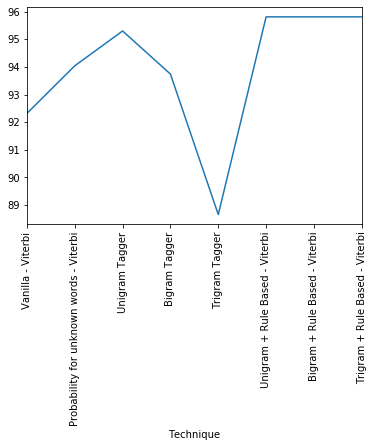

In [317]:
acccuracy_validation_data_df.plot.line(rot = 90, legend = False)

From all the above techniques when considered **"Lexicon Unigram backed with Rule Based Tagger"** algorithm worked well.

### 2. On Test Sentences 

In [318]:
sample_test_tokenized_sents = [word_tokenize(sent) for sent in test_sentences_lines]
sample_test_corpus_pos_tags = nltk.pos_tag_sents(sample_test_tokenized_sents, tagset = 'universal')
sample_test_corpus_pos_tags

[[('Android', 'NOUN'),
  ('is', 'VERB'),
  ('a', 'DET'),
  ('mobile', 'ADJ'),
  ('operating', 'NOUN'),
  ('system', 'NOUN'),
  ('developed', 'VERB'),
  ('by', 'ADP'),
  ('Google', 'NOUN'),
  ('.', '.')],
 [('Android', 'NOUN'),
  ('has', 'VERB'),
  ('been', 'VERB'),
  ('the', 'DET'),
  ('best-selling', 'ADJ'),
  ('OS', 'NOUN'),
  ('worldwide', 'NOUN'),
  ('on', 'ADP'),
  ('smartphones', 'NOUN'),
  ('since', 'ADP'),
  ('2011', 'NUM'),
  ('and', 'CONJ'),
  ('on', 'ADP'),
  ('tablets', 'NOUN'),
  ('since', 'ADP'),
  ('2013', 'NUM'),
  ('.', '.')],
 [('Google', 'NOUN'),
  ('and', 'CONJ'),
  ('Twitter', 'NOUN'),
  ('made', 'VERB'),
  ('a', 'DET'),
  ('deal', 'NOUN'),
  ('in', 'ADP'),
  ('2015', 'NUM'),
  ('that', 'DET'),
  ('gave', 'VERB'),
  ('Google', 'NOUN'),
  ('access', 'NOUN'),
  ('to', 'PRT'),
  ('Twitter', 'NOUN'),
  ("'s", 'PRT'),
  ('firehose', 'NOUN'),
  ('.', '.')],
 [('Twitter', 'NOUN'),
  ('is', 'VERB'),
  ('an', 'DET'),
  ('online', 'ADJ'),
  ('news', 'NOUN'),
  ('and', 'CONJ'

In [319]:
# list of untagged words from the sample test data provided
sample_test_tagged_words = [tup[0] for sent in sample_test_corpus_pos_tags for tup in sent]

# list of tagged words
sample_test_test_run_base = [tup for sent in sample_test_corpus_pos_tags for tup in sent]

In [320]:
def getTestSentencesAccuracy(sample_test_tagged_seq):
    # Let's check the accuracy of the vanilla viterbi algorithm
    sample_test_check = [i for i, j in zip(sample_test_tagged_seq, sample_test_test_run_base) if i == j]
    accuracy = len(sample_test_check) / len(sample_test_tagged_seq)
    accuracy = round(accuracy * 100, 2)
    return accuracy

#### 1. Vanilla Viterbi

In [321]:
# tagging the test sentences
sample_test_tagged_seq = Viterbi(sample_test_tagged_words)

vanilla_viterbi_accuracy_on_sample_test_data = getTestSentencesAccuracy(sample_test_tagged_seq)

print("The accuracy of the Vanilla Viterbi Algorithm on the sample test data is: ", vanilla_viterbi_accuracy_on_sample_test_data)

The accuracy of the Vanilla Viterbi Algorithm on the sample test data is:  76.8


#### 2. Viterbi for Unknown Words (Probability) on sample test data

In [322]:
# tagging the test sentences
sample_test_unknown_word_tagged_seq = Viterbi_Unknown_Prob(sample_test_tagged_words)

sample_test_unknown_viterbi_accuracy = getTestSentencesAccuracy(sample_test_unknown_word_tagged_seq)

print("The accuracy of the Viterbi for Unknown Words (Probability) on the sample test data is: ", sample_test_unknown_viterbi_accuracy)

The accuracy of the Viterbi for Unknown Words (Probability) on the sample test data is:  86.19


#### 3. Viterbi with Unigram backed with Rule based tagger on sample test data

In [323]:
# tagging the test sentences
sample_test_uni_regex_tagged_seq = Viterbi_Lexicon_Rule_Based(sample_test_tagged_words, tagger = unigram_rule_based_tagger)

sample_test_uni_regex_viterbi_accuracy = getTestSentencesAccuracy(sample_test_uni_regex_tagged_seq)

print("The accuracy of the Viterbi with Unigram backed with Rule based tagger on sample test data is: ", sample_test_uni_regex_viterbi_accuracy)

The accuracy of the Viterbi with Unigram backed with Rule based tagger on sample test data is:  92.27


#### 4. Viterbi with Bigram backed with Rule based tagger on sample test data

In [324]:
# tagging the test sentences
sample_test_bi_regex_tagged_seq = Viterbi_Lexicon_Rule_Based(sample_test_tagged_words, tagger = bigram_rule_based_tagger)

sample_test_bi_regex_viterbi_accuracy = getTestSentencesAccuracy(sample_test_bi_regex_tagged_seq)

print("The accuracy of the Viterbi with Bigram backed with Rule based tagger on sample test data is: ", sample_test_bi_regex_viterbi_accuracy)

The accuracy of the Viterbi with Bigram backed with Rule based tagger on sample test data is:  92.27


#### 5. Viterbi with Trigram backed with Rule based tagger on sample test data

In [325]:
# tagging the test sentences
sample_test_tri_regex_tagged_seq = Viterbi_Lexicon_Rule_Based(sample_test_tagged_words, tagger = trigram_rule_based_tagger)

sample_test_tri_regex_viterbi_accuracy = getTestSentencesAccuracy(sample_test_tri_regex_tagged_seq)

print("The accuracy of the Viterbi with Trigram backed with Rule based tagger on sample test data is: ", sample_test_tri_regex_viterbi_accuracy)

The accuracy of the Viterbi with Trigram backed with Rule based tagger on sample test data is:  92.27


In [326]:
acccuracy_sample_data = [['Vanilla - Viterbi', vanilla_viterbi_accuracy_on_sample_test_data],
                         ['Probability for unknown words - Viterbi', sample_test_unknown_viterbi_accuracy],
                         ['Unigram + Rule Based - Viterbi', sample_test_uni_regex_viterbi_accuracy],
                         ['Bigram + Rule Based - Viterbi', sample_test_bi_regex_viterbi_accuracy],
                         ['Trigram + Rule Based - Viterbi', sample_test_tri_regex_viterbi_accuracy]]
                
acccuracy_sample_data_df = pd.DataFrame(acccuracy_sample_data, columns = ['Technique', 'Accuracy'])

acccuracy_sample_data_df.set_index('Technique', drop = True, inplace = True)

acccuracy_sample_data_df

,Accuracy
Technique,
Vanilla - Viterbi,76.80
Probability for unknown words - Viterbi,86.19
Unigram + Rule Based - Viterbi,92.27
Bigram + Rule Based - Viterbi,92.27
Trigram + Rule Based - Viterbi,92.27


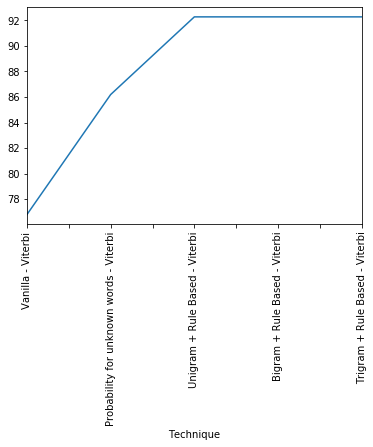

In [327]:
acccuracy_sample_data_df.plot.line(rot = 90, legend = False)

From all the above techniques when considered **"Lexicon Unigram backed with Rule Based Tagger"** algorithm worked well.

### Compare the tagging accuracies of the modifications with the vanilla Viterbi algorithm

In [328]:
acccuracy = [['Vanilla - Viterbi', vanilla_viterbi_accuracy, vanilla_viterbi_accuracy_on_sample_test_data],
             ['Probability for unknown words - Viterbi', modified_vitebri_accuracy_prob, sample_test_unknown_viterbi_accuracy],
             ['Unigram + Rule Based - Viterbi', modified_vitebri_unigram_regex_accuracy, sample_test_uni_regex_viterbi_accuracy]]
                  
acccuracy_df = pd.DataFrame(acccuracy, columns = ['Technique', 'Validation Data Accuracy', 'Sample Test Data Accuracy'])

acccuracy_df.set_index('Technique', drop = True, inplace = True)

acccuracy_df

,Validation Data Accuracy,Sample Test Data Accuracy
Technique,,
Vanilla - Viterbi,92.32,76.80
Probability for unknown words - Viterbi,94.04,86.19
Unigram + Rule Based - Viterbi,95.81,92.27


From all the above techniques when considered **"Lexicon Unigram backed with Rule Based Tagger"** algorithm worked well.

### List down cases which were incorrectly tagged by original POS tagger and got corrected by your modifications

In [329]:
# Applying modified viterbi algorithm on words from Test_sentences.txt file
# Choosing Lexicon Unigram backed with Rule Based Tagger algorithm from above results
test_sentences_tags_modified = []
for line in test_sentences_lines:
    test_sentences_tags_modified = test_sentences_tags_modified + list(Viterbi_Lexicon_Rule_Based(word_tokenize(line), tagger = unigram_rule_based_tagger))
test_sentences_tags_modified

[('Android', 'NOUN'),
 ('is', 'VERB'),
 ('a', 'DET'),
 ('mobile', 'ADJ'),
 ('operating', 'NOUN'),
 ('system', 'NOUN'),
 ('developed', 'VERB'),
 ('by', 'ADP'),
 ('Google', 'NOUN'),
 ('.', '.'),
 ('Android', 'NOUN'),
 ('has', 'VERB'),
 ('been', 'VERB'),
 ('the', 'DET'),
 ('best-selling', 'ADJ'),
 ('OS', 'NOUN'),
 ('worldwide', 'NOUN'),
 ('on', 'ADP'),
 ('smartphones', 'VERB'),
 ('since', 'ADP'),
 ('2011', 'NUM'),
 ('and', 'CONJ'),
 ('on', 'ADP'),
 ('tablets', 'NOUN'),
 ('since', 'ADP'),
 ('2013', 'NUM'),
 ('.', '.'),
 ('Google', 'NOUN'),
 ('and', 'CONJ'),
 ('Twitter', 'NOUN'),
 ('made', 'VERB'),
 ('a', 'DET'),
 ('deal', 'NOUN'),
 ('in', 'ADP'),
 ('2015', 'NUM'),
 ('that', 'ADP'),
 ('gave', 'VERB'),
 ('Google', 'NOUN'),
 ('access', 'NOUN'),
 ('to', 'PRT'),
 ('Twitter', 'NOUN'),
 ("'s", 'PRT'),
 ('firehose', 'NOUN'),
 ('.', '.'),
 ('Twitter', 'NOUN'),
 ('is', 'VERB'),
 ('an', 'DET'),
 ('online', 'NOUN'),
 ('news', 'NOUN'),
 ('and', 'CONJ'),
 ('social', 'ADJ'),
 ('networking', 'NOUN'),
 ('s

In [330]:
# Getting the tags predicted by the modified vitebri algorithm for the unknown words
unknown_modified_viterbi = [t for t in test_sentences_tags_modified for v in vocab_not_in_corpus if t[0] == v ]
unknown_modified_viterbi

[('Android', 'NOUN'),
 ('Google', 'NOUN'),
 ('Android', 'NOUN'),
 ('OS', 'NOUN'),
 ('worldwide', 'NOUN'),
 ('smartphones', 'VERB'),
 ('2011', 'NUM'),
 ('2013', 'NUM'),
 ('Google', 'NOUN'),
 ('Twitter', 'NOUN'),
 ('2015', 'NUM'),
 ('Google', 'NOUN'),
 ('Twitter', 'NOUN'),
 ('firehose', 'NOUN'),
 ('Twitter', 'NOUN'),
 ('online', 'NOUN'),
 ('interact', 'NOUN'),
 ('messages', 'VERB'),
 ('tweets', 'NOUN'),
 ('domineering', 'VERB'),
 ('personality', 'NOUN'),
 ('2018', 'NUM'),
 ('FIFA', 'NOUN'),
 ('Cup', 'NOUN'),
 ('21st', 'NOUN'),
 ('FIFA', 'NOUN'),
 ('Cup', 'NOUN'),
 ('tournament', 'NOUN'),
 ('contested', 'VERB'),
 ('Cup', 'NOUN'),
 ('trips', 'NOUN'),
 ('arriving', 'VERB'),
 ('NASA', 'NOUN'),
 ('invited', 'VERB'),
 ('ICESAT-2', 'NOUN'),
 ('Satellite', 'NOUN')]

In [331]:
tag_corrections = pd.DataFrame(columns = ['Vanilla Viterbi', 'Modified Viterbi'])
tag_corrections = tag_corrections.fillna(0)

tag_corrections['Vanilla Viterbi'] = [tup for tup in unknown_vanilla_viterbi]
tag_corrections['Modified Viterbi'] = [tup for tup in unknown_modified_viterbi]

tag_corrections

,Vanilla Viterbi,Modified Viterbi
0,"(Android, ADJ)","(Android, NOUN)"
1,"(Google, ADJ)","(Google, NOUN)"
2,"(Android, ADJ)","(Android, NOUN)"
3,"(OS, ADJ)","(OS, NOUN)"
4,"(worldwide, ADJ)","(worldwide, NOUN)"
5,"(smartphones, ADJ)","(smartphones, VERB)"
6,"(2011, ADJ)","(2011, NUM)"
7,"(2013, ADJ)","(2013, NUM)"
8,"(Google, ADJ)","(Google, NOUN)"
9,"(Twitter, ADJ)","(Twitter, NOUN)"


From Test_sentences.txt, the unknown words which are correctly tagged by our modified viterbi algorithm:

- Android, Google, OS, Twitter, NASA, etc.. are identified as NOUN correctly
- 2011, 2013, 2015, 2018 are identified as NUM
- invented, domineering, contested are identified as VERB

There are few more other incorrectly tagged words, this might occur due to the Rule based tagger has only few set of regex and if the word doesn't match any it automatically assigns it as noun.

## Conclusion

As we can see from the above results, most of the words which were incorrectly tagged by the vanilla viterbi algorithm are now correctly tagged by our modified viterbi algorithm.
The modification techniques choosed for the analysis are:

**Technique 1 :**
- Discarding emission probabilities for unknown words as they are equal to zeo.
- Considering only the transition probabilities for unknown words.

**Technique 2 :**
- Using Vitebri algorithm backing with Lexicon Tagger (Unigram) which inturn backs up on Rule Based Regex Tagger.
- This technique works well for both the validation data set as well as sample test sentences.
- Many words which were incorrectly tagged with Vanilla Viterbi are correctly tagged with this technique.